In [1]:
import math
import collections
import urllib

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pp

%matplotlib inline

In [16]:
import getweather

allyears = np.vstack([getweather.getyear('NEW YORK', ['TMIN', 'TMAX'], year) for year in range(1880, 2020)])
midcentury = np.vstack([getweather.getyear('NEW YORK', ['TMIN', 'TMAX'], year) for year in range(1945, 1955)])

In [17]:
tavg_record = np.average(0.5*(allyears['TMIN']+allyears['TMAX']), axis=0)
tavg_mid = np.average(0.5*(midcentury['TMIN']+midcentury['TMAX']), axis=0)

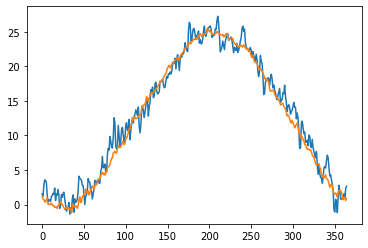

In [30]:
pp.plot(tavg_mid)
pp.plot(tavg_record)

In [25]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [26]:
# compute and plot the temperature anomaly time series for any station

allyears = np.arange(1880, 2020)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)

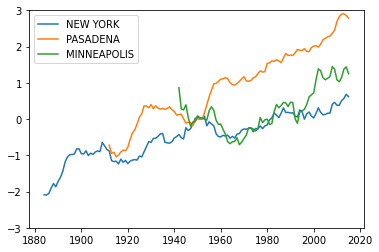

In [28]:
plotanomaly('NEW YORK')
plotanomaly('PASADENA')
plotanomaly('MINNEAPOLIS')

pp.legend()